In [18]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("BigBasket Products.csv")

In [22]:
# Checking the head of the data
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [24]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [26]:
# Checking the columns.

df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [28]:
# Converting columns name to first letter uppercase
df.columns = [col.strip().capitalize() for col in df.columns]

In [60]:
# Checking for datatypes

df.dtypes

Product          object
Category         object
Sub_category     object
Brand            object
Sale_price      float64
Market_price    float64
Type             object
Rating          float64
Description      object
dtype: object

In [30]:
# Describtion

df.describe()

,Index,Sale_price,Market_price,Rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [34]:
# We remove the index column because it just a serial number.

df.drop(columns=['Index'], inplace=True)

In [36]:
# checking for duplicates vales.

df.duplicated().sum()

354

In [38]:
# Removing duplicates value because is of no use.

df = df.drop_duplicates()

In [40]:
# Checking for Null values.
print(df.isnull().sum())
print("----------------------Null percentage----------------------")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Product            1
Category           0
Sub_category       0
Brand              1
Sale_price         0
Market_price       0
Type               0
Rating          8463
Description      113
dtype: int64
----------------------Null percentage----------------------
Product          0.003676
Category         0.000000
Sub_category     0.000000
Brand            0.003676
Sale_price       0.000000
Market_price     0.000000
Type             0.000000
Rating          31.112827
Description      0.415426
dtype: float64


In [42]:
# Drop the row with missing Product since it's only 1 and Product is essential
df = df.dropna(subset=['Product'])

# Checking again to confirm Product column has no missing values
df['Product'].isnull().sum()

0

In [44]:
# Drop the row with missing brand since it's only 1 and Product is essential
df = df.dropna(subset=['Brand'])

# Checking again to confirm brand column has no missing values
df['Brand'].isnull().sum()


0

In [46]:
# Filling missing ratings with overall mean

mean_rating = df['Rating'].mean()
df["Rating"] = df['Rating'].fillna(mean_rating)

In [48]:
# Drop rows with missing description
df = df.dropna(subset=['Description'])


In [52]:
# Rechecing if null values are treated or not
df.isnull().sum()

Product         0
Category        0
Sub_category    0
Brand           0
Sale_price      0
Market_price    0
Type            0
Rating          0
Description     0
dtype: int64

In [56]:
# Checking skewed columns

skewd_columns = df.select_dtypes(include="number").skew()
print(f"Skewess : {skewd_columns}")

Skewess : Sale_price      6.214777
Market_price    5.819367
Rating         -2.098769
dtype: float64


In [68]:
for col in ['Sale_price', 'Market_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers remaining")


Sale_price: 0 outliers remaining
Market_price: 0 outliers remaining


In [70]:
df.head()

,Product,Category,Sub_category,Brand,Sale_price,Market_price,Type,Rating,Description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


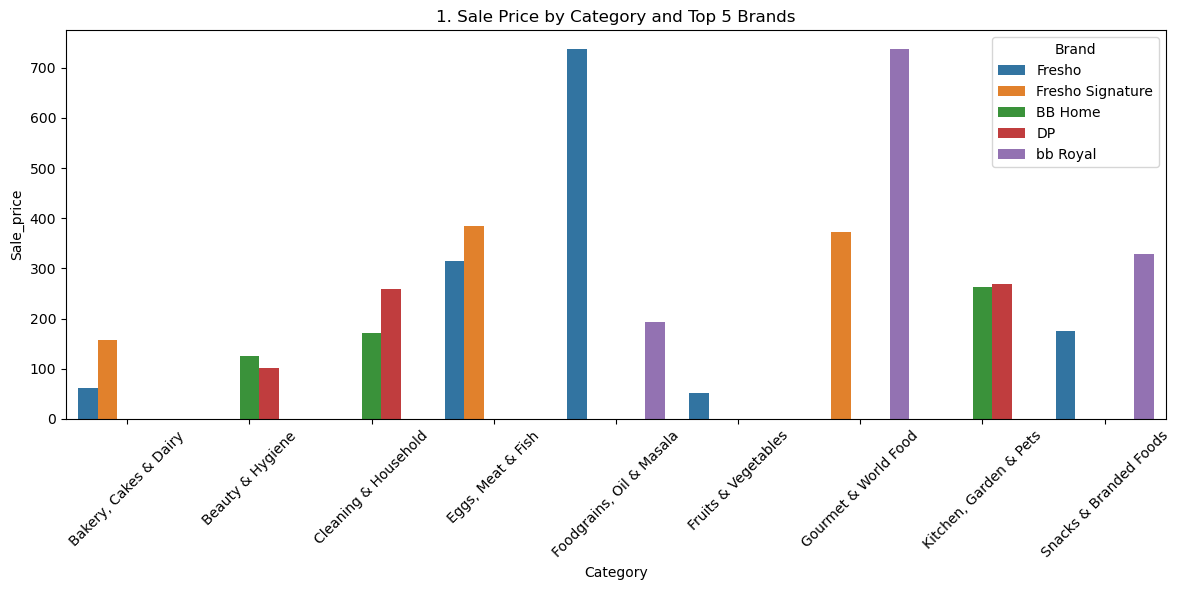

In [83]:
# 1. Grouped Bar Chart of Sale Price by Category and Brand [Top 5 Brands]
top_brands = df['Brand'].value_counts().head(5).index
bar_data = df[df['Brand'].isin(top_brands)]
grouped_data = bar_data.groupby(['Category', 'Brand'])['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Category', y='Sale_price', hue='Brand')
plt.title("1. Sale Price by Category and Top 5 Brands")
plt.xticks(rotation=45)
plt.tight_layout()



### Conclusion:

* Some brands dominate specific categories with higher average prices.
* For example, premium brands may show higher prices in groceries or beverages.
* Price variation is clearly visible across categories.

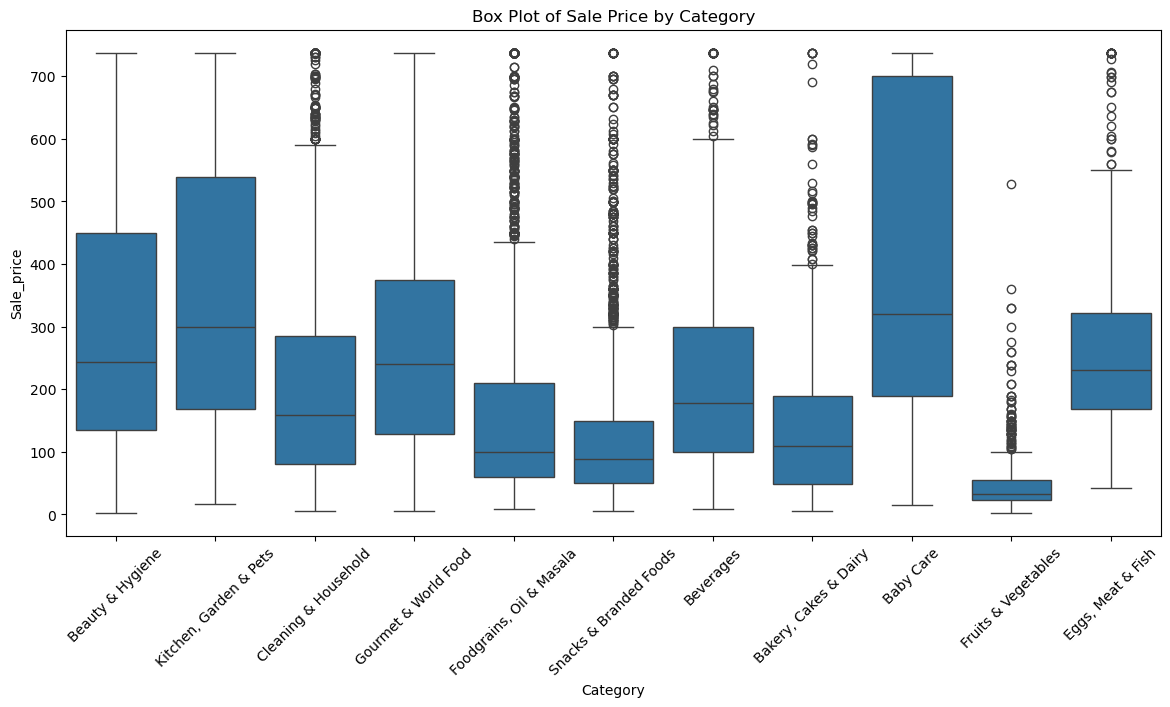

In [85]:
# 2. Box Plot: Sale Price by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Sale_price')
plt.title("Box Plot of Sale Price by Category")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Conclusion:

* Certain categories have a wide price range (e.g., packaged food, personal care).
* Outliers are present in most categories but are now capped.
* Some categories consistently offer lower or more uniform prices.

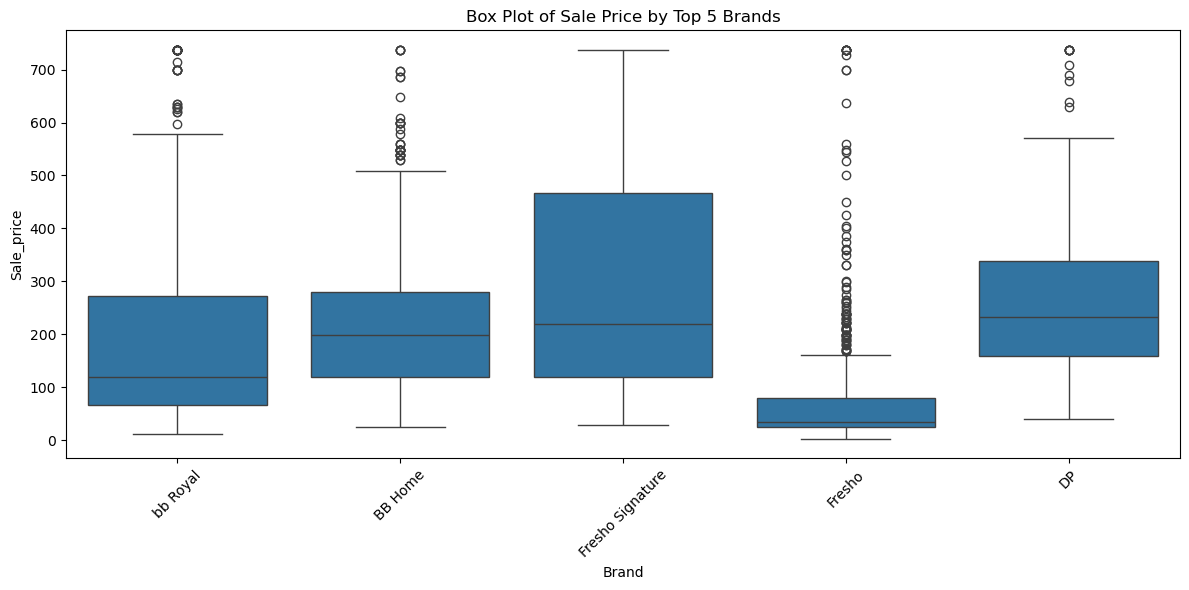

In [90]:
# 3. Box Plot: Sale Price by Brand (Top 5 only)
plt.figure(figsize=(12, 6))
sns.boxplot(data=bar_data, x='Brand', y='Sale_price')
plt.title("Box Plot of Sale Price by Top 5 Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusion:

* Brands show distinct pricing strategies.

* Some brands have narrow, consistent pricing (e.g., budget brands), while others have a wider range.

* A few outlier products still exist even among top brands.

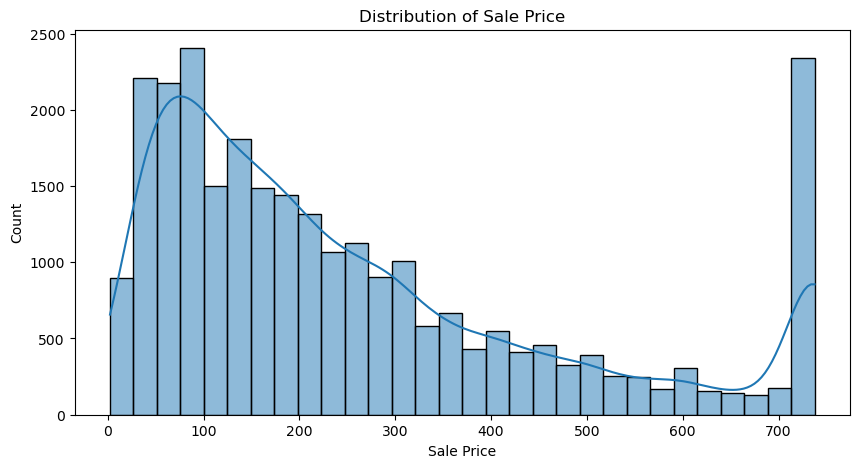

In [95]:
# 4. Distribution Plot: Sale Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Sale_price'], kde=True, bins=30)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.show()

### Conclusion:

* Most products are priced at the lower end (right-skewed distribution).
* A small number of high-priced products push the tail toward the right.
* The majority of items fall below a certain price threshold.

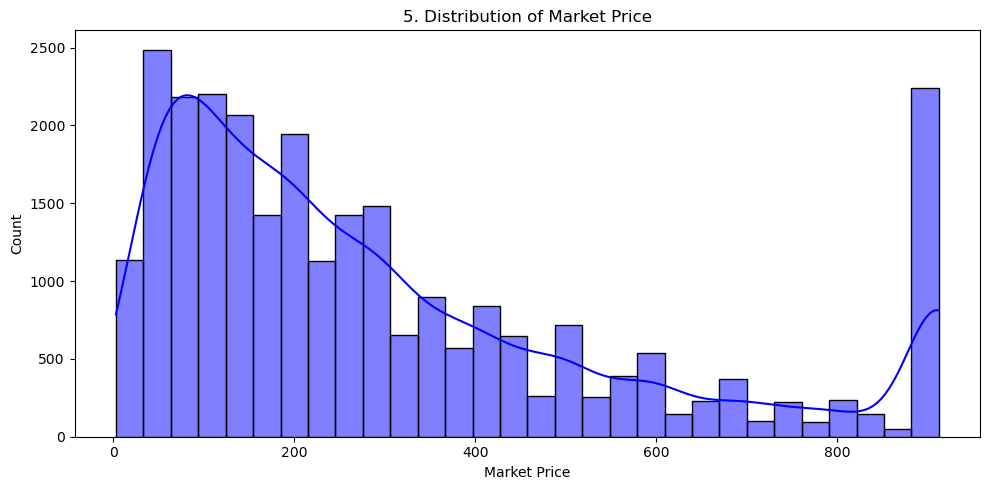

In [100]:
# 5. Distribution Plot: Market Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Market_price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Market Price")
plt.xlabel("Market Price")
plt.tight_layout()
plt.show()

### Conclusion:

* Similar to sale price, the market price is also right-skewed.
* Market prices are generally higher than sale prices, as expected.
* Most products are marketed below a specific value, suggesting pricing strategies.

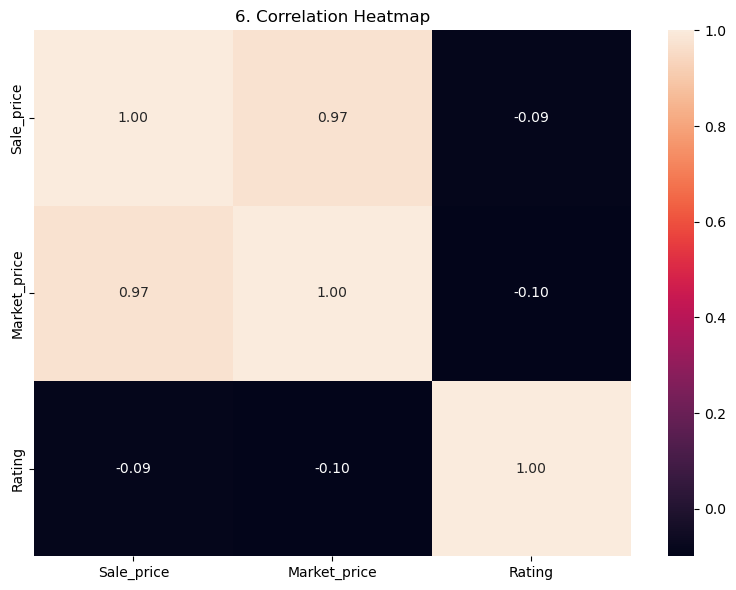

In [103]:
# 6. Correlation Heatmap of numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f")
plt.title("correlation Heatmap")
plt.tight_layout()
plt.show()

### Conclusion:

* Strong correlation between Sale Price and Market Price (expected).
* Rating has a weak correlation with pricing — implying ratings don't heavily influence price directly.

# Statistics Alalysis

In [132]:
from scipy.stats import ttest_ind
 
# Getting top 2 brands
top_brands = df['Brand'].value_counts().head(2).index.tolist()
brand1 = df[df['Brand'] == top_brands[0]]['Sale_price']
brand2 = df[df['Brand'] == top_brands[1]]['Sale_price']

# T-test between Fresho and bb Royal

t_stat, p_val = stats.ttest_ind(brand1, brand2, equal_var=False)

print(f"T-test between {top_brands[0]} and {top_brands[1]}")
print(f"T-statistic = {t_stat:.4f}, P-value = {p_val}")

if p_val < 0.05:
    print("Significant difference")
    
else:
    print("No significant difference")

T-test between Fresho and bb Royal
T-statistic = -12.0038, P-value = 7.367686857386305e-31
Significant difference


In [134]:
# Category-wise Statistics

category_stats = df.groupby('Category')['Sale_price'].agg(['mean', 'median', 'std'])
print(category_stats)


                                mean  median         std
Category                                                
Baby Care                 398.271905  319.33  243.539370
Bakery, Cakes & Dairy     142.204835  109.00  127.593937
Beauty & Hygiene          313.730818  243.75  224.751605
Beverages                 224.181443  177.20  171.732543
Cleaning & Household      210.556905  159.00  174.919651
Eggs, Meat & Fish         276.498605  230.00  175.457051
Foodgrains, Oil & Masala  173.822579  100.00  178.200633
Fruits & Vegetables        50.903525   32.00   54.308877
Gourmet & World Food      278.264379  239.70  193.146761
Kitchen, Garden & Pets    357.660308  299.00  227.391681
Snacks & Branded Foods    127.842054   88.00  130.428152


In [140]:
# performing f_oneway Anova test 

# Grouping data by Category for ANOVA
groups = [group['Sale_price'].values for _, group in df.groupby('Category')]

# ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA F-statistic = {f_stat:.4f}, P-value = {p_value}")

if p_value < 0.05:
    print("Significant price variation between categories")
else:
    print("No significant difference between categories")


ANOVA F-statistic = 470.6151, P-value = 0.0
Significant price variation between categories
